# 🦋 IrisSense (A smart way to sense/classify Iris flowers)

# **Step 1: Import Libraries**

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [9]:
from sklearn.datasets import load_iris

In [15]:
data = load_iris()

In [17]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [19]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [31]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [33]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

* **Till now we have understood that Logistic Regression with two values of target variable is >> Binary Classification**

# **Step 2:Exploratory Data Analysis(EDA)**

In [71]:
# Check summary statistics
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         100.000000        100.000000         100.000000   
mean            5.471000          3.099000           2.861000   
std             0.641698          0.478739           1.449549   
min             4.300000          2.000000           1.000000   
25%             5.000000          2.800000           1.500000   
50%             5.400000          3.050000           2.450000   
75%             5.900000          3.400000           4.325000   
max             7.000000          4.400000           5.100000   

       petal width (cm)      target  
count        100.000000  100.000000  
mean           0.786000    0.500000  
std            0.565153    0.502519  
min            0.100000    0.000000  
25%            0.200000    0.000000  
50%            0.800000    0.500000  
75%            1.300000    1.000000  
max            1.800000    1.000000  


target
0    50
1    50
Name: count, dtype: int64


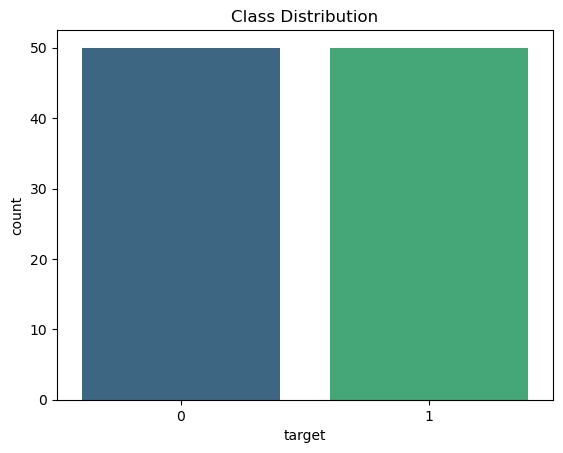

In [73]:
# Check target class distribution
print(df['target'].value_counts())
sns.countplot(x=df['target'], palette='viridis')
plt.title("Class Distribution")
plt.show()

**Observations:**

* **The dataset has four numerical features and one target variable.**
* **The target has three classes (0, 1, and 2).**
* **We will filter out class 2 for binary classification.**

# Filter Dataset for Binary Classification

In [82]:
df = df[df['target'] != 2]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [84]:
# Check updated class distribution
print(df['target'].value_counts())

target
0    50
1    50
Name: count, dtype: int64


In [88]:
df.target.unique()

array([0, 1])

# Check for Missing Values and Outliers


In [96]:
# Check for missing values
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


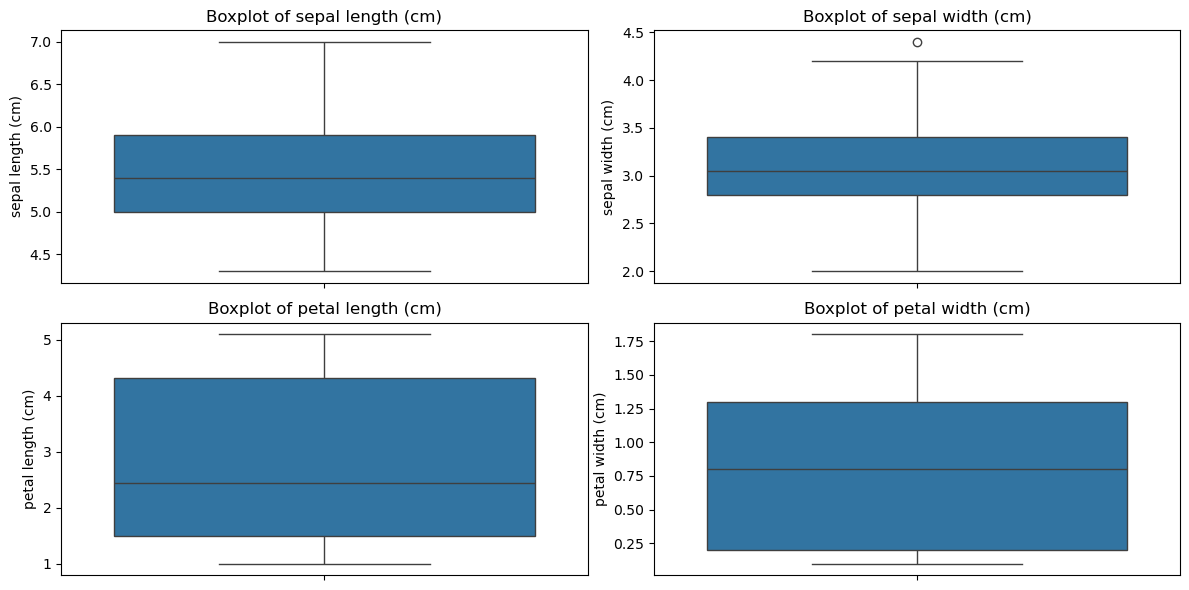

In [98]:
# Check for outliers using boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

**Observation:**
* **No missing values in the dataset.**
* **Outliers may be present in some features—could be handled via transformation or removal.**

# Visualize Relationships Between Features

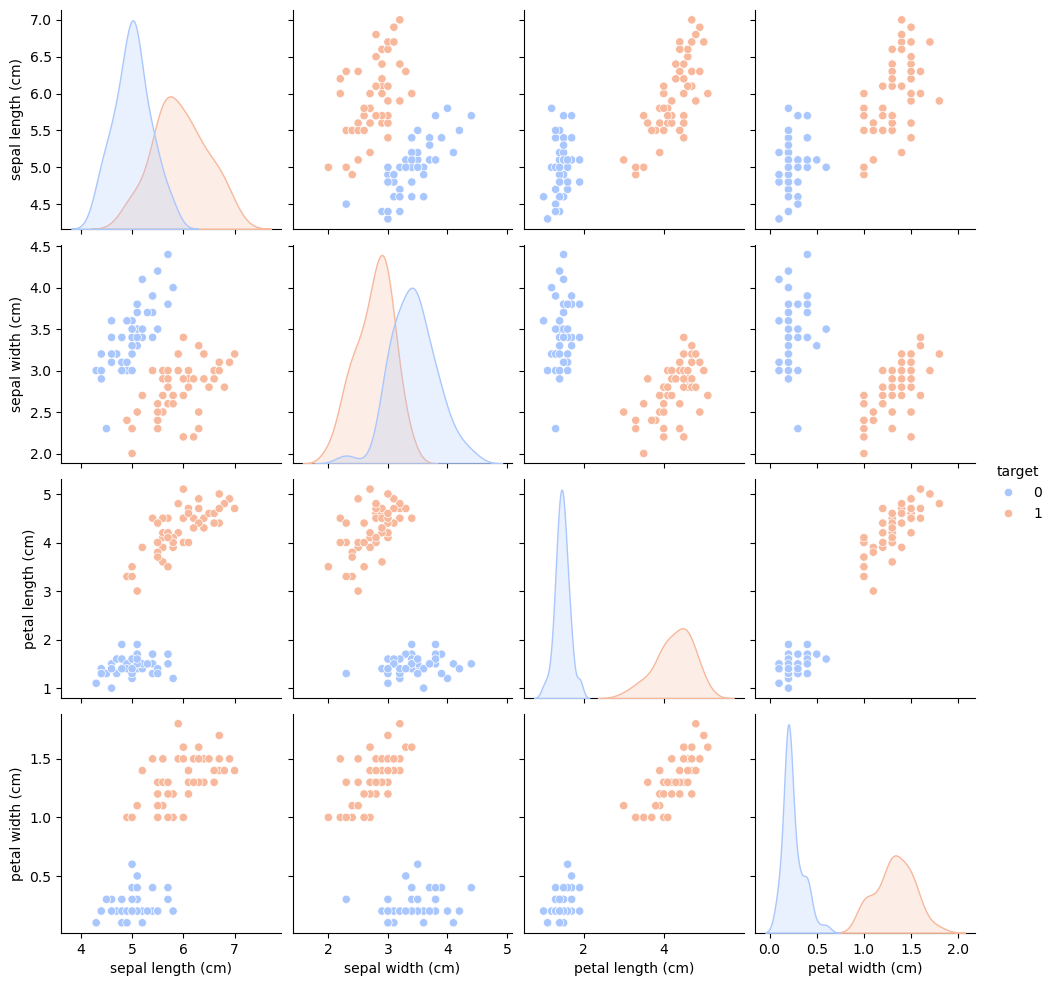

In [106]:
# Pairplot to see feature relationships
sns.pairplot(df, hue="target", diag_kind='kde', palette="coolwarm")
plt.show()

**Observations:**

* **Features petal length and petal width show clear separation between classes.**
* **Sepal length and sepal width have some overlap but still contribute to classification.**

# Correlation Analysis

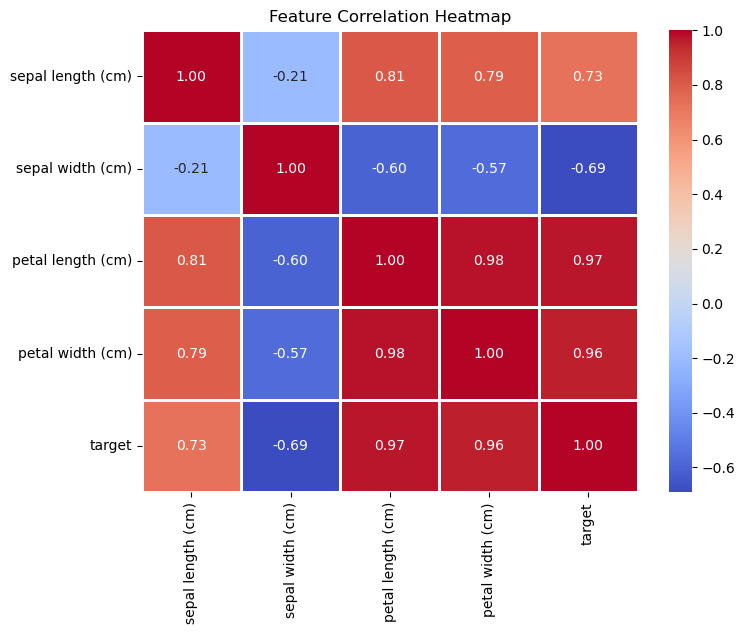

In [110]:
# Compute correlation matrix
corr_matrix = df.corr()

# Visualize correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Feature Correlation Heatmap")
plt.show()


**Observation:**
* **Petal length and petal width are highly correlated → could lead to multicollinearity.**
* **Sepal width has a weaker correlation with the target.**

# **Step 3: Splitting Features and Target**

In [121]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [127]:
X = df.iloc[: ,: -1] # Select all rows and all columns except the last one

y = df.iloc[:,-1]  # Select all rows and only the last column (target)

In [134]:
X


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [136]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int32

# **Step 4: Standardization (Feature Scaling)**

In [132]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features


# **Step 5: Train-Test Split**

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


# **Step 6: Train the Logistic Regression Model**

In [147]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

# **Step 7: Make Predictions**

In [179]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores for ROC curve
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [181]:
y_prob

array([0.86411062, 0.99862068, 0.9925019 , 0.99107339, 0.01694012,
       0.01048827, 0.03561915, 0.99373828, 0.02957992, 0.00383115,
       0.00929817, 0.99466605, 0.01900117, 0.01429646, 0.01547547,
       0.90094111, 0.9699952 , 0.0202089 , 0.9919265 , 0.97685601])

In [183]:
model.predict_proba(X_test)

array([[0.13588938, 0.86411062],
       [0.00137932, 0.99862068],
       [0.0074981 , 0.9925019 ],
       [0.00892661, 0.99107339],
       [0.98305988, 0.01694012],
       [0.98951173, 0.01048827],
       [0.96438085, 0.03561915],
       [0.00626172, 0.99373828],
       [0.97042008, 0.02957992],
       [0.99616885, 0.00383115],
       [0.99070183, 0.00929817],
       [0.00533395, 0.99466605],
       [0.98099883, 0.01900117],
       [0.98570354, 0.01429646],
       [0.98452453, 0.01547547],
       [0.09905889, 0.90094111],
       [0.0300048 , 0.9699952 ],
       [0.9797911 , 0.0202089 ],
       [0.0080735 , 0.9919265 ],
       [0.02314399, 0.97685601]])

# **Step 8: Model Evaluation**

# 1️.Accuracy Score

In [188]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


# 2. Precision

In [191]:
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')



Precision: 1.00


# 3️ .Classification Report

In [162]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# 4. Recall (True Positive Rate - TPR)

In [198]:
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')


Recall: 1.00


# 5.F1-Score

In [202]:
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')


F1 Score: 1.00


# Step 9: Confusion Matrix

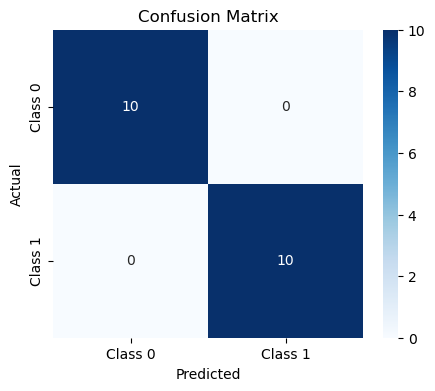

In [205]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



# **Step 10: ROC Curve & AUC**

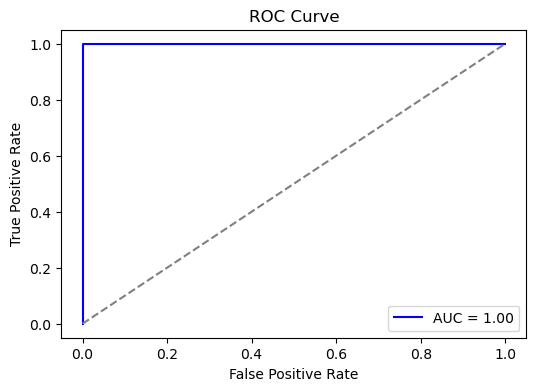

In [208]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# **Step 11: K-Fold Cross Validation**

In [221]:
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores):.2f}")


Mean Cross-Validation Accuracy: 1.00


# **Step 12: Hyperparameter Tuning (Grid Search)**

In [228]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 0.01}


# **✅ Final Summary of Steps**
* ✔ Load dataset and select two classes for binary classification
* ✔ EDA (data exploration, visualization)
* ✔ Feature Engineering (scaling, handling imbalance)
* ✔ Train-Test Split
* ✔ Train Logistic Regression Model
* ✔ Model Evaluation using accuracy, precision, recall, F1-score, confusion matrix
* ✔ ROC-AUC Curve analysis
* ✔ Cross-Validation
* ✔ Hyperparameter tuning for best performance